### Carolyn Randall
#### Looking at student data from Kaggle
#### please ignore the HR and NZ migration data stuff as those were my inital sets I tried
#### There are two data sets one for student math class and one for student Portuguese class
#### I would like to see if I can determine what factors contribute to the low grades and the high grades
#### I would also like to see if there is any difference between Math and Portuguese grades for students in both sets.  Just what I am thinking now



#### Some things to try xxx
* EXPLORE the data
* Visual the data
* run some models - will probably try linear regression, and maybe decision tree and then decide what other models to apply

## for my homework I am still just exploring and trying visualizations
### as this is the third data set I tried, and I am now happy to use this, I have not gottenvery far just basic exploration

In [6]:
#import some libraries
import pandas as pd
import numpy as np

In [7]:
# read the student maths data set into a Dataframe called 'studentmat
studentmat = pd.read_csv('student-mat.csv')  
# read the student portuguese data into a Dataframe called 'studentport'
studentport = pd.read_csv('student-por.csv')  

###  Below is a description of what the headings and the values in these fields means
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2.	sex - student's sex (binary: 'F' - female or 'M' - male)

3.	age - student's age (numeric: from 15 to 22)

4.	address - student's home address type (binary: 'U' - urban or 'R' - rural)

5.	famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6.	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7.	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8.	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9.	Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10.	Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11.	reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12.	guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup - extra educational support (binary: yes or no)
17.	famsup - family educational support (binary: yes or no)
18.	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities - extra-curricular activities (binary: yes or no)
20.	nursery - attended nursery school (binary: yes or no)
21.	higher - wants to take higher education (binary: yes or no)
22.	internet - Internet access at home (binary: yes or no)
23.	romantic - with a romantic relationship (binary: yes or no)
24.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	health - current health status (numeric: from 1 - very bad to 5 - very good)	30.	absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
	1.	G1 - first period grade (numeric: from 0 to 20)
	2.	G2 - second period grade (numeric: from 0 to 20)
	3.	G3 - final grade (numeric: from 0 to 20, output target)


In [8]:
# take a peak at the head of studentmat
studentmat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# take a look at the tail of studentmat
studentmat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [10]:
# Let us see how many rows there are in Math student data
len(studentmat)

395

In [11]:
# lets look at the shape, rows and columns
studentmat.shape

(395, 33)

In [12]:
# let us get a description of maths student data
studentmat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
# ADD HERE a quick comment on the data above, initial observations

In [14]:
# do we have any missing data?
studentmat.isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
# take a peak at the tail of studentport
studentport.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
# take a look at the tail of studentport
studentport.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [17]:
#let us look at the number of rows in the Portuguese data
len(studentport)

649

In [18]:
# let us look at rows and columns
studentport.shape

(649, 33)

In [19]:
# let us take a peak using description
studentport.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [20]:
# do we have any missing data?
studentport.isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [21]:
# ADD HERE  a comment on the intial observation of the describe data

 #### Let us see if there are students that are in both data sets - How can we do this?
 #### There are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

#### The addional file provided contains the following
d1=read.table("student-mat.csv",sep=";",header=TRUE)
d2=read.table("student-por.csv",sep=";",header=TRUE)

d3=merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))
print(nrow(d3)) # 382 students


In [22]:
# but we need to do this in python as the sample above is in R I think
# So how do we do this in Python?
#data.source=merge(studentmat,studentport,by=c("school","sex","age","address","famsize","Pstatus",
                        #    "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                         #   "guardian","guardian","traveltime","studytime","failures",
                        #    "schoolsup","famsup","activities","higher","romantic",
                        #    "famrel","freetime","goout","Dalc","Walc","health","absences"))

In [25]:
# Select only the math observations with G1 < 15 just a number above mean
studentmat[(studentmat['G1']>15)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
31,GP,M,15,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0,17,16,17
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0,17,16,16
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
65,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,15
69,GP,F,15,R,LE3,T,3,1,other,other,...,4,4,2,2,3,3,12,16,16,16
91,GP,F,15,U,GT3,T,4,3,services,other,...,4,5,5,1,3,1,4,16,17,18
101,GP,M,16,U,GT3,T,4,4,services,teacher,...,4,4,3,1,1,4,0,16,17,17
104,GP,M,15,U,GT3,A,3,4,services,other,...,5,4,4,1,1,1,0,16,18,18


In [26]:
# Select only the portuguese observations with G1 < 15 just a number above mean
studentport[(studentport['G1']>15)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,6,17,17,17
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,2,17,17,17
51,GP,F,15,U,LE3,T,4,2,health,other,...,4,3,3,1,1,5,0,16,14,16
59,GP,F,16,U,GT3,T,4,2,services,other,...,4,2,3,1,1,5,2,16,15,16
60,GP,F,16,R,GT3,T,4,4,health,teacher,...,2,4,4,2,3,4,0,17,16,16
65,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,16
101,GP,M,16,U,GT3,T,4,4,services,teacher,...,4,4,3,1,1,4,0,16,16,16
104,GP,M,15,U,GT3,A,3,4,services,other,...,5,4,4,1,1,1,0,16,16,16
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,10,18,17,18
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,5,4,4,1,2,5,6,16,14,14


### do some visualizing

In [27]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115636a58>]], dtype=object)

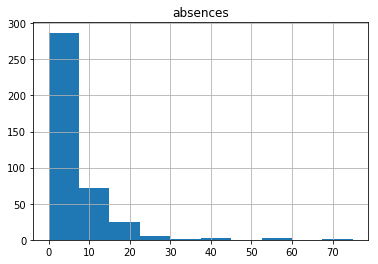

In [29]:
studentmat[['absences']].hist()

In [30]:
# not really sure how to interpret the graph above just did it to see what would come out

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115647d68>]], dtype=object)

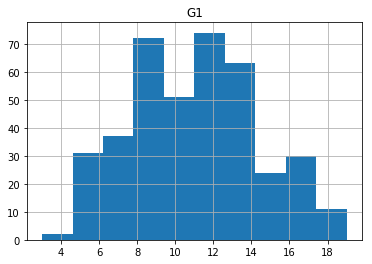

In [31]:
studentmat[['G1']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11572ee10>]], dtype=object)

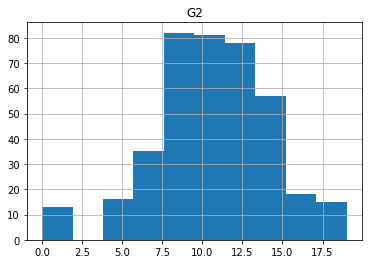

In [32]:
studentmat[['G2']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159ebef0>]], dtype=object)

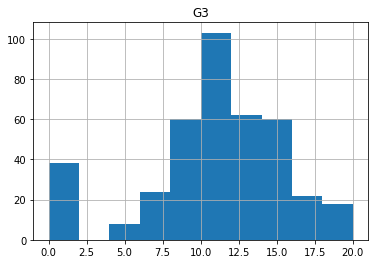

In [33]:
studentmat[['G3']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115ac1240>]], dtype=object)

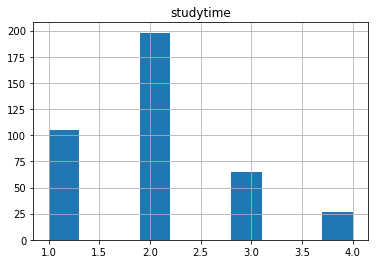

In [34]:
studentmat[['studytime']].hist()

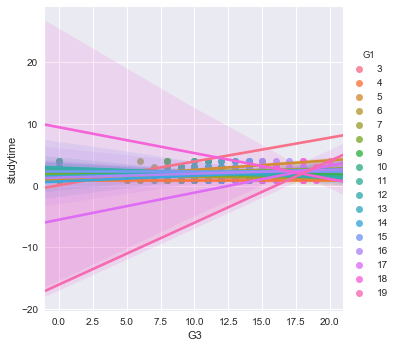

In [46]:
#try a scatter plot
import seaborn as sns
sns.set(color_codes=True)
# Draw a Scatterplot showing G1 and studytime
sns.lmplot(x='G3', y="studytime", hue="G1", data=studentmat, fit_reg=True)

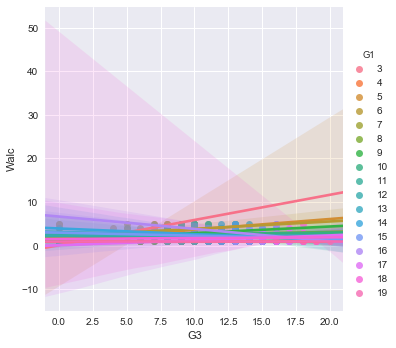

In [45]:
# now look at a plot with G1 and WALC weekend alcohol consumption
sns.lmplot(x='G3', y="Walc", hue="G1", data=studentmat, fit_reg=True)

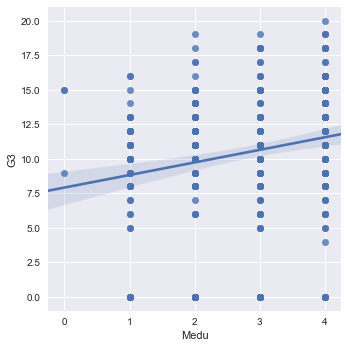

In [44]:
# check the distribution of G1 vs. Medu mothers education using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='Medu', data=studentmat)

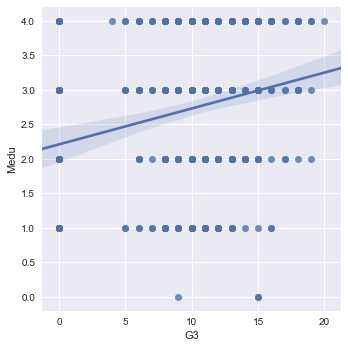

In [43]:
# check the distribution of G1 vs. Medu mothers education using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='Medu', x='G3', data=studentmat)

In [49]:
# create a DataFrame with the minimum and maximum values of G3
# these values will be be used in the built model to predict the grade
X_new = pd.DataFrame({'G3': [studentmat.G3.min(), studentmat.G3.max()]})
X_new.head()

,G3
0,0
1,20
